# Mobile Money Fraud Transaction Detection System

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter

In [40]:
df = pd.read_csv('mobile_money_transactions.csv')
df.head()

transaction_id user_id transaction_type    amount device_id     location  \
0        T000000   U0568         cash_out   1866.53      D154       Owerri   
1        T000001   U0497          cash_in   1365.35      D086         Ajah   
2        T000002   U0269          receive  10722.95      D039  Portharcout   
3        T000003   U0428          cash_in   1077.56      D026         Kano   
4        T000004   U0035          receive   7068.91      D118        Ikeja   

             timestamp channel agent_id  sim_swap_flag  balance_before  \
0  2024-03-25 16:38:00   Agent     A175              0        93705.92   
1  2024-04-11 23:47:00    USSD     A298              0        90286.08   
2  2024-04-01 14:52:00   Agent     A112              0        14613.59   
3  2024-03-13 00:14:00     App     A171              1         4801.55   
4  2024-06-28 23:38:00    USSD     A107              0        73981.31   

   balance_after  transaction_velocity  
0       91839.39                     1  
1       88920.73                     0  
2        3890.64                     0  
3        3723.99                     0  
4       66912.40                     2

## Performing EDA

In [41]:
for col in df.columns:
    print(df[col].value_counts())

transaction_id
T049983    1
T049982    1
T049981    1
T049980    1
T049979    1
          ..
T000004    1
T000003    1
T000002    1
T000001    1
T000000    1
Name: count, Length: 50000, dtype: int64
user_id
U0517    76
U0762    73
U0725    72
U0742    72
U0945    71
         ..
U0663    32
U0843    31
U0483    31
U0793    30
U0454    27
Name: count, Length: 1000, dtype: int64
transaction_type
send        17555
receive     17417
cash_in      7606
cash_out     7422
Name: count, dtype: int64
amount
963.13     3
2292.71    3
911.25     3
1466.86    3
1205.23    3
          ..
8390.14    1
319.87     1
851.86     1
3081.94    1
116.31     1
Name: count, Length: 48780, dtype: int64
device_id
D182    287
D112    285
D038    282
D148    281
D085    280
       ... 
D087    217
D004    213
D105    213
D001    212
D180    208
Name: count, Length: 200, dtype: int64
location
Owerri         6359
Ikeja          6326
Portharcout    6314
Kano           6247
Ajah           6240
Yaba           6200
Makur

In [42]:
#checking for missing values
df.isnull().sum()

transaction_id          0
user_id                 0
transaction_type        0
amount                  0
device_id               0
location                0
timestamp               0
channel                 0
agent_id                0
sim_swap_flag           0
balance_before          0
balance_after           0
transaction_velocity    0
dtype: int64

In [43]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [44]:
#dropping the following columns: transaction_id	user_id
df.drop(columns=['transaction_id','user_id','agent_id','device_id'], inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_type      50000 non-null  object 
 1   amount                50000 non-null  float64
 2   location              50000 non-null  object 
 3   timestamp             50000 non-null  object 
 4   channel               50000 non-null  object 
 5   sim_swap_flag         50000 non-null  int64  
 6   balance_before        50000 non-null  float64
 7   balance_after         50000 non-null  float64
 8   transaction_velocity  50000 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.4+ MB


In [46]:
#changing the timestamp column to datetime datatype
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [47]:
df

transaction_type    amount     location           timestamp channel  \
0             cash_out   1866.53       Owerri 2024-03-25 16:38:00   Agent   
1              cash_in   1365.35         Ajah 2024-04-11 23:47:00    USSD   
2              receive  10722.95  Portharcout 2024-04-01 14:52:00   Agent   
3              cash_in   1077.56         Kano 2024-03-13 00:14:00     App   
4              receive   7068.91        Ikeja 2024-06-28 23:38:00    USSD   
...                ...       ...          ...                 ...     ...   
49995          receive   8390.14          Aba 2024-02-18 07:15:00     App   
49996             send    319.87      Makurdi 2024-02-29 20:30:00     App   
49997          receive    851.86        Ikeja 2024-06-12 08:32:00   Agent   
49998          cash_in   3081.94        Ikeja 2024-02-02 22:18:00     App   
49999          cash_in    566.94          Aba 2024-03-06 04:30:00    USSD   

       sim_swap_flag  balance_before  balance_after  transaction_velocity  
0                  0        93705.92       91839.39                     1  
1                  0        90286.08       88920.73                     0  
2                  0        14613.59        3890.64                     0  
3                  1         4801.55        3723.99                     0  
4                  0        73981.31       66912.40                     2  
...              ...             ...            ...                   ...  
49995              0        54450.12       46059.98                     1  
49996              0        12168.33       11848.46                     1  
49997              0        73184.15       72332.29                     0  
49998              0        84692.66       81610.72                     0  
49999              0        16814.64       16247.70                     1  

[50000 rows x 9 columns]

In [48]:
# Derive time-based features
df["hour_of_day"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_type      50000 non-null  object        
 1   amount                50000 non-null  float64       
 2   location              50000 non-null  object        
 3   timestamp             50000 non-null  datetime64[ns]
 4   channel               50000 non-null  object        
 5   sim_swap_flag         50000 non-null  int64         
 6   balance_before        50000 non-null  float64       
 7   balance_after         50000 non-null  float64       
 8   transaction_velocity  50000 non-null  int64         
 9   hour_of_day           50000 non-null  int32         
 10  day_of_week           50000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(3)
memory usage: 3.8+ MB


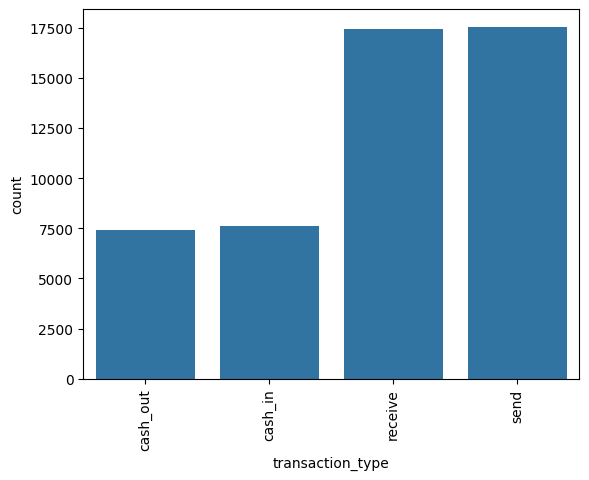

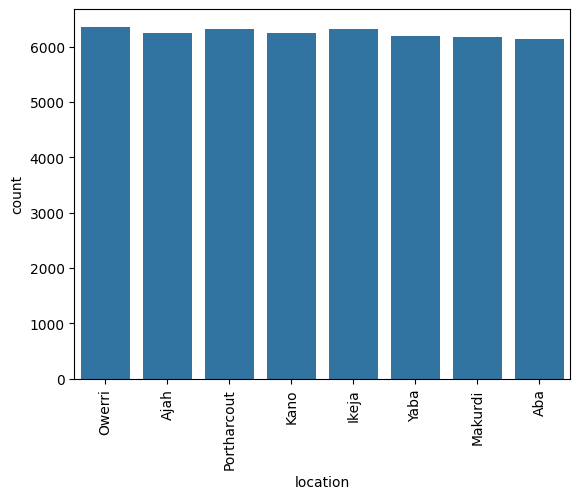

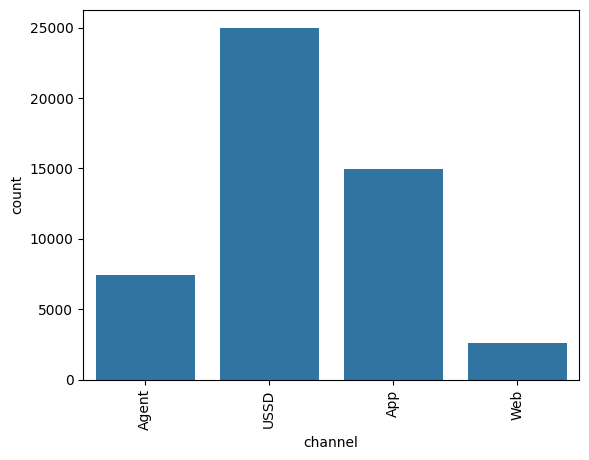

In [50]:
#visualizing the categorical variables
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show()

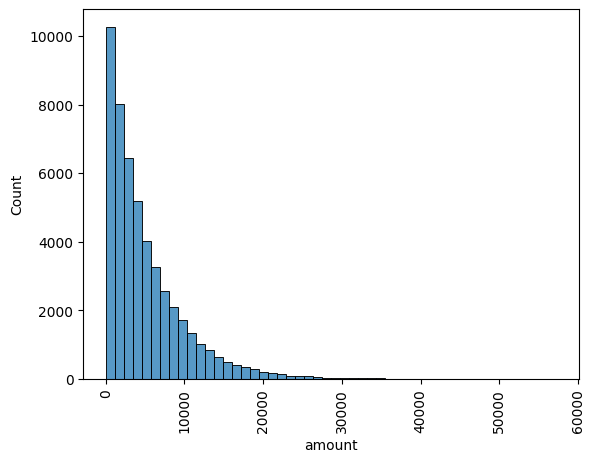

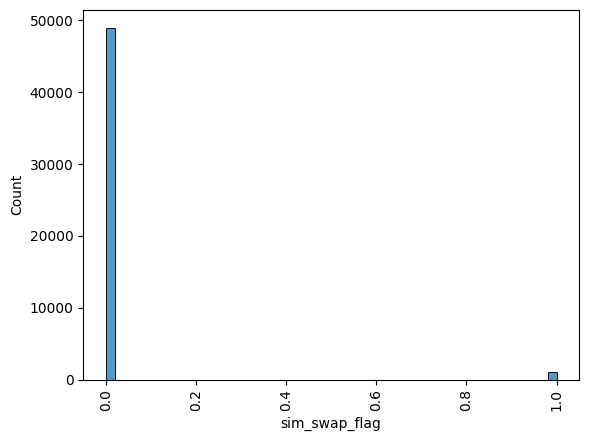

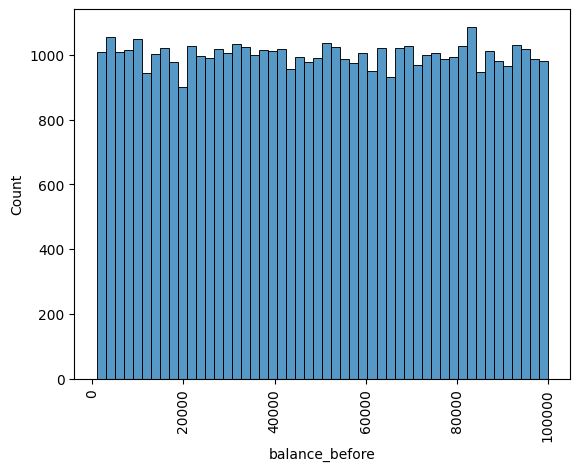

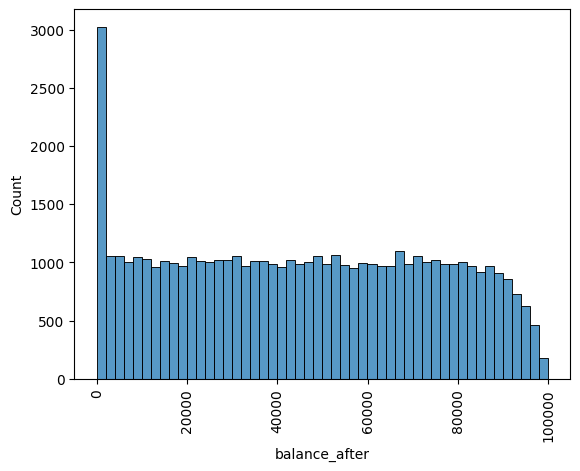

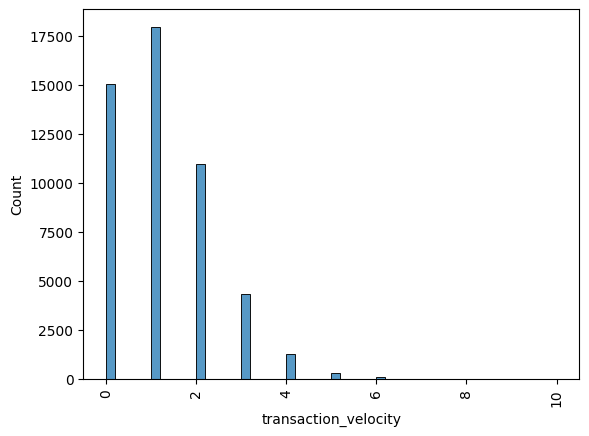

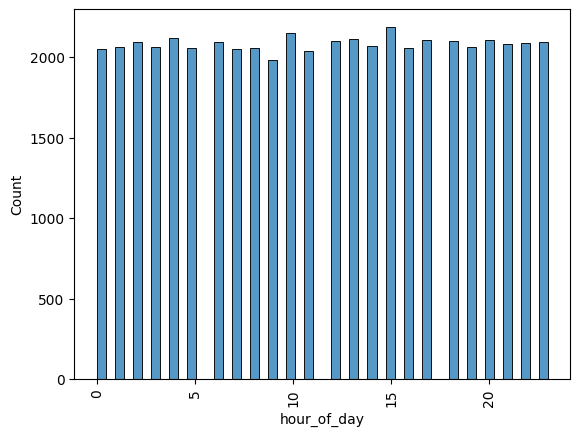

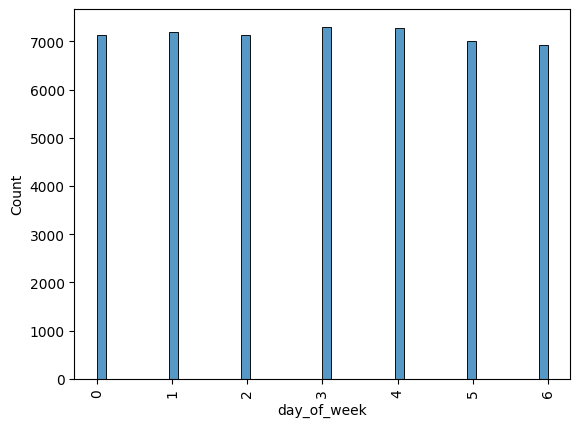

In [51]:
#visualizing the numerical variables
for col in df.select_dtypes(include=['float','int']).columns:
    sns.histplot(data=df[col], bins=50)
    plt.xticks(rotation=90)
    plt.show()

In [52]:
#Encoding the hour of day and the day of week feature to capture real life time and day instead of it numerical value
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)


In [53]:
df.head()

transaction_type    amount     location           timestamp channel  \
0         cash_out   1866.53       Owerri 2024-03-25 16:38:00   Agent   
1          cash_in   1365.35         Ajah 2024-04-11 23:47:00    USSD   
2          receive  10722.95  Portharcout 2024-04-01 14:52:00   Agent   
3          cash_in   1077.56         Kano 2024-03-13 00:14:00     App   
4          receive   7068.91        Ikeja 2024-06-28 23:38:00    USSD   

   sim_swap_flag  balance_before  balance_after  transaction_velocity  \
0              0        93705.92       91839.39                     1   
1              0        90286.08       88920.73                     0   
2              0        14613.59        3890.64                     0   
3              1         4801.55        3723.99                     0   
4              0        73981.31       66912.40                     2   

   hour_of_day  day_of_week  hour_sin  hour_cos   day_sin   day_cos  
0           16            0 -0.866025 -0.500000  0.000000  1.000000  
1           23            3 -0.258819  0.965926  0.433884 -0.900969  
2           14            0 -0.500000 -0.866025  0.000000  1.000000  
3            0            2  0.000000  1.000000  0.974928 -0.222521  
4           23            4 -0.258819  0.965926 -0.433884 -0.900969

### Preprocessing 

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()

#separating the features
#numerical features
num_col = df.select_dtypes(exclude=['object','datetime64[ns]']).columns
cat_col = df.select_dtypes(include=['object'])


In [55]:
scaler.fit(df[num_col])

StandardScaler()

In [56]:
#transforming
df[num_col] = scaler.transform(df[num_col])

In [57]:
cat_col

transaction_type     location channel
0             cash_out       Owerri   Agent
1              cash_in         Ajah    USSD
2              receive  Portharcout   Agent
3              cash_in         Kano     App
4              receive        Ikeja    USSD
...                ...          ...     ...
49995          receive          Aba     App
49996             send      Makurdi     App
49997          receive        Ikeja   Agent
49998          cash_in        Ikeja     App
49999          cash_in          Aba    USSD

[50000 rows x 3 columns]

In [58]:
# Encode categorical features (e.g., transaction_type, location)
label_encoders = {}

In [59]:
for col in cat_col:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le

In [60]:
label_encoders

{'transaction_type': LabelEncoder(),
 'location': LabelEncoder(),
 'channel': LabelEncoder()}

In [61]:
df.head()

transaction_type    amount  location           timestamp  channel  \
0                 1 -0.630018         5 2024-03-25 16:38:00        0   
1                 0 -0.729966         1 2024-04-11 23:47:00        2   
2                 2  1.136169         6 2024-04-01 14:52:00        0   
3                 0 -0.787358         3 2024-03-13 00:14:00        1   
4                 2  0.407464         2 2024-06-28 23:38:00        2   

   sim_swap_flag  balance_before  balance_after  transaction_velocity  \
0      -0.142857        1.512870       1.614019             -0.184980   
1      -0.142857        1.393336       1.512107             -1.095134   
2      -0.142857       -1.251638      -1.456922             -1.095134   
3       7.000000       -1.594597      -1.462741             -1.095134   
4      -0.142857        0.823437       0.743633              0.725175   

   hour_of_day  day_of_week  hour_sin  hour_cos   day_sin   day_cos  
0     0.645754    -1.499892 -1.219541 -0.705471 -0.009887  1.419813  
1     1.657558     0.008689 -0.360691  1.367378  0.605837 -1.259642  
2     0.356667    -1.499892 -0.701824 -1.223038 -0.009887  1.419813  
3    -1.666942    -0.494171  0.005390  1.415560  1.373633 -0.303356  
4     1.657558     0.511550 -0.360691  1.367378 -0.625611 -1.259642

### Training the Unspervised Model

In [62]:
from sklearn.ensemble import IsolationForest

#selecting features for anomaly detection
#balance_after, amount, balance_before, hour_sin, hour_cos, day_cos, day_sin, transaction_velocity
features = ['amount', 'balance_before', 'balance_after', 
            'hour_sin','hour_cos','day_sin','day_cos', 'transaction_velocity']

X = df[features]

In [63]:
# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)

# Predict anomalies (-1 for fraud, 1 for normal)
df['anomaly_score'] = model.decision_function(X)
df['is_anomaly'] = model.predict(X)

# Convert -1 (anomaly) to True, 1 (normal) to False
df['is_fraud'] = df['is_anomaly'].map({-1: True, 1: False})

In [64]:
df[df['is_fraud']==True]

transaction_type    amount  location           timestamp  channel  \
50                    2  4.946327         3 2024-04-25 20:45:00        2   
109                   2  2.908809         6 2024-06-05 18:15:00        2   
116                   2  1.248479         4 2024-06-02 09:24:00        0   
120                   2  0.616291         5 2024-02-27 11:58:00        0   
176                   1  4.958588         3 2024-06-08 02:10:00        0   
...                 ...       ...       ...                 ...      ...   
49534                 3 -0.723148         4 2024-02-14 03:25:00        0   
49624                 3 -0.733512         3 2024-03-26 18:38:00        1   
49630                 3  1.082877         3 2024-06-01 01:22:00        1   
49943                 1  2.407097         1 2024-03-21 12:04:00        0   
49958                 3  5.592933         4 2024-06-21 12:15:00        2   

       sim_swap_flag  balance_before  balance_after  transaction_velocity  \
50         -0.142857        1.146343       0.271497              0.725175   
109        -0.142857       -1.502382      -1.560834              2.545484   
116        -0.142857        1.554655       1.326854              3.455638   
120        -0.142857       -1.586672      -1.560760              4.365793   
176        -0.142857       -0.888592      -1.562153             -1.095134   
...              ...             ...            ...                   ...   
49534      -0.142857        1.436516       1.554048              3.455638   
49624      -0.142857        1.716845       1.835907              2.545484   
49630      -0.142857        1.662651       1.463736              2.545484   
49943      -0.142857       -1.513748      -1.586074              1.635329   
49958      -0.142857       -1.463191      -1.578024              0.725175   

       hour_of_day  day_of_week  hour_sin  hour_cos   day_sin   day_cos  \
50        1.223928     0.008689 -1.219541  0.708550  0.605837 -1.259642   
109       0.934841    -0.494171 -1.409039  0.001540  1.373633 -0.303356   
116      -0.366051     1.517271  1.005543 -0.998324 -1.119383  0.889114   
120      -0.076964    -0.997032  0.371471 -1.364299  1.099610  0.889114   
176      -1.377855     1.014410  0.712605  1.226117 -1.393406 -0.303356   
...            ...          ...       ...       ...       ...       ...   
49534    -1.233311    -0.494171  1.005543  1.001403  1.373633 -0.303356   
49624     0.934841    -0.997032 -1.409039  0.001540  1.099610  0.889114   
49630    -1.522398     1.014410  0.371471  1.367378 -1.393406 -0.303356   
49943     0.067580     0.008689  0.005390 -1.412481  0.605837 -1.259642   
49958     0.067580     0.511550  0.005390 -1.412481 -0.625611 -1.259642   

       anomaly_score  is_anomaly  is_fraud  
50         -0.006760          -1      True  
109        -0.035674          -1      True  
116        -0.011679          -1      True  
120        -0.012213          -1      True  
176        -0.012253          -1      True  
...              ...         ...       ...  
49534      -0.000034          -1      True  
49624      -0.011451          -1      True  
49630      -0.012178          -1      True  
49943      -0.011092          -1      True  
49958      -0.027915          -1      True  

[500 rows x 18 columns]

### Training the Supervised Model

In [65]:
X_df = X.copy()
X_df['is_anomaly'] = model.predict(X)

# Convert -1 (anomaly) to True, 1 (normal) to False
X_df['is_fraud'] = df['is_anomaly'].map({-1: 1, 1: 0})

In [66]:
X_df[X_df['is_fraud']==True]

amount  balance_before  balance_after  hour_sin  hour_cos   day_sin  \
50     4.946327        1.146343       0.271497 -1.219541  0.708550  0.605837   
109    2.908809       -1.502382      -1.560834 -1.409039  0.001540  1.373633   
116    1.248479        1.554655       1.326854  1.005543 -0.998324 -1.119383   
120    0.616291       -1.586672      -1.560760  0.371471 -1.364299  1.099610   
176    4.958588       -0.888592      -1.562153  0.712605  1.226117 -1.393406   
...         ...             ...            ...       ...       ...       ...   
49534 -0.723148        1.436516       1.554048  1.005543  1.001403  1.373633   
49624 -0.733512        1.716845       1.835907 -1.409039  0.001540  1.099610   
49630  1.082877        1.662651       1.463736  0.371471  1.367378 -1.393406   
49943  2.407097       -1.513748      -1.586074  0.005390 -1.412481  0.605837   
49958  5.592933       -1.463191      -1.578024  0.005390 -1.412481 -0.625611   

        day_cos  transaction_velocity  is_anomaly  is_fraud  
50    -1.259642              0.725175          -1         1  
109   -0.303356              2.545484          -1         1  
116    0.889114              3.455638          -1         1  
120    0.889114              4.365793          -1         1  
176   -0.303356             -1.095134          -1         1  
...         ...                   ...         ...       ...  
49534 -0.303356              3.455638          -1         1  
49624  0.889114              2.545484          -1         1  
49630 -0.303356              2.545484          -1         1  
49943 -1.259642              1.635329          -1         1  
49958 -1.259642              0.725175          -1         1  

[500 rows x 10 columns]

In [67]:
# dropping the is_anomaly score value
del X_df['is_anomaly']

<Axes: xlabel='is_fraud', ylabel='count'>

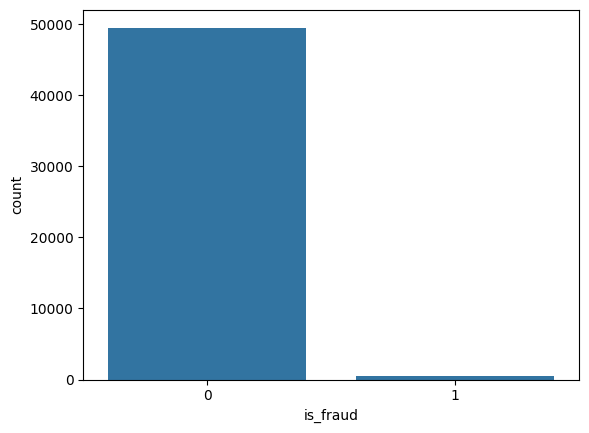

In [68]:
#visualizing the distribution of anomaly
sns.countplot(X_df, x='is_fraud')

The dataset is really inbalance, so lets treat using smote

#### Treating imbalance issue using smote

In [69]:
#separating the dataset in to X and Y
X = X_df.drop(columns='is_fraud')
y = X_df['is_fraud']

In [70]:
#splitting dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [71]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_smote))

After SMOTE: Counter({0: 34650, 1: 34650})


In [72]:
#fitting the dataset across various classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#evaluation metrics
from sklearn.metrics import classification_report, precision_score, roc_auc_score, confusion_matrix

In [73]:
#SVC
svc = SVC()
svc.fit(X_smote, y_smote)
y_pred_svc = svc.predict(X_test)

#evaluating
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[14705   145]
 [    4   146]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14850
           1       0.50      0.97      0.66       150

    accuracy                           0.99     15000
   macro avg       0.75      0.98      0.83     15000
weighted avg       0.99      0.99      0.99     15000



In [74]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred_rf = rf.predict(X_test)

#evaluating
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[14806    44]
 [   29   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14850
           1       0.73      0.81      0.77       150

    accuracy                           1.00     15000
   macro avg       0.87      0.90      0.88     15000
weighted avg       1.00      1.00      1.00     15000



In [ ]:
roc_auc_score(y_test, y_pred_rf)


np.float64(0.9018518518518518)

In [76]:
rf.predict([[-0.630018,1.512870,1.614019,	-1.219541,	-0.705471,	-0.009887,	1.419813,	-0.184980,]])

c:\Users\DELL\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [77]:
rf.predict([[4.946327,1.146343,0.271497,-1.219541,0.708550,0.605837,-1.259642,0.725175]])

c:\Users\DELL\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#create a function for the preprocessing
#dump the scaler
#dump the label encoder
#fine-tune the randomforest model
#cross-validate the model
#dump the randomforest model
